Found 26 image pairs
Average size: 601x570


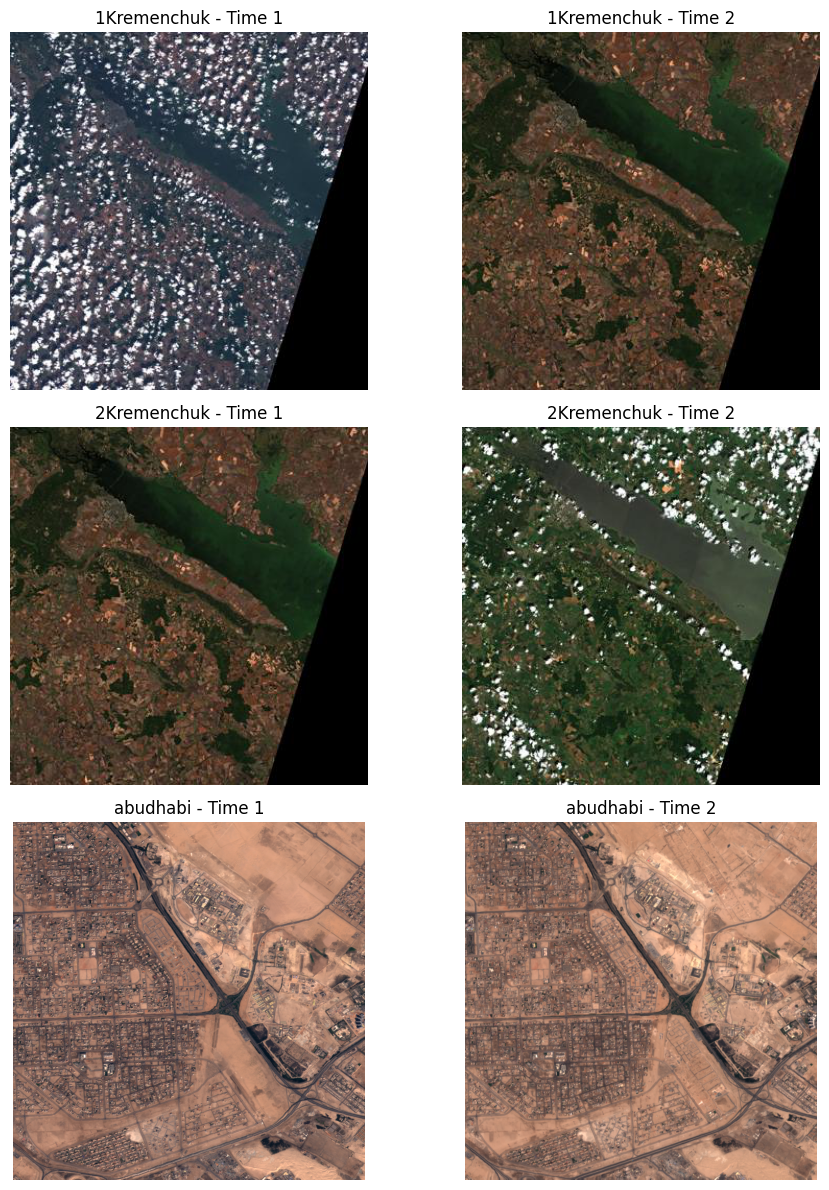

Saved to: dataset_pairs\dataset_info.json


In [1]:
# This Notebook contains dataset preparation for training and inference of Satellite Matching  Model

import cv2
import numpy as np
from pathlib import Path
import json
import matplotlib.pyplot as plt


# Dataset path
ONERA_DIR = Path(r"data\onera-dataset")
OUTPUT_DIR = Path("dataset_pairs")
OUTPUT_DIR.mkdir(exist_ok=True)


# Collect image pairs
cities = [d for d in ONERA_DIR.iterdir() if d.is_dir()]
pairs = []


for city_dir in cities:
    img1_path = city_dir / "pair" / "img1.png"
    img2_path = city_dir / "pair" / "img2.png"

    if img1_path.exists() and img2_path.exists():
        img1 = cv2.imread(str(img1_path))
        if img1 is not None:
            pairs.append({
                'city': city_dir.name,
                'img1': str(img1_path),
                'img2': str(img2_path),
                'shape': img1.shape
            })


print(f"Found {len(pairs)} image pairs")
print(f"Average size: {np.mean([p['shape'][0] for p in pairs]):.0f}x{np.mean([p['shape'][1] for p in pairs]):.0f}")

# Visualize 3 examples
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
for i in range(min(3, len(pairs))):
    img1 = cv2.cvtColor(cv2.imread(pairs[i]['img1']), cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(cv2.imread(pairs[i]['img2']), cv2.COLOR_BGR2RGB)

    axes[i, 0].imshow(img1)
    axes[i, 0].set_title(f"{pairs[i]['city']} - Time 1")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(img2)
    axes[i, 1].set_title(f"{pairs[i]['city']} - Time 2")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.savefig('dataset_samples.png')
plt.show()

# Save dataset info
with open(OUTPUT_DIR / 'dataset_info.json', 'w') as f:
    json.dump({'num_pairs': len(pairs), 'pairs': pairs}, f, indent=2)

print(f"Saved to: {OUTPUT_DIR / 'dataset_info.json'}")